#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])


# Create X and y vectors
X = data[:, :2]  # First two columns: features (size and bedrooms)
y = data[:, 2]   # Last column: target (price)
X= X.reshape(-1,2)
y= y.reshape(-1,1)
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0]:.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


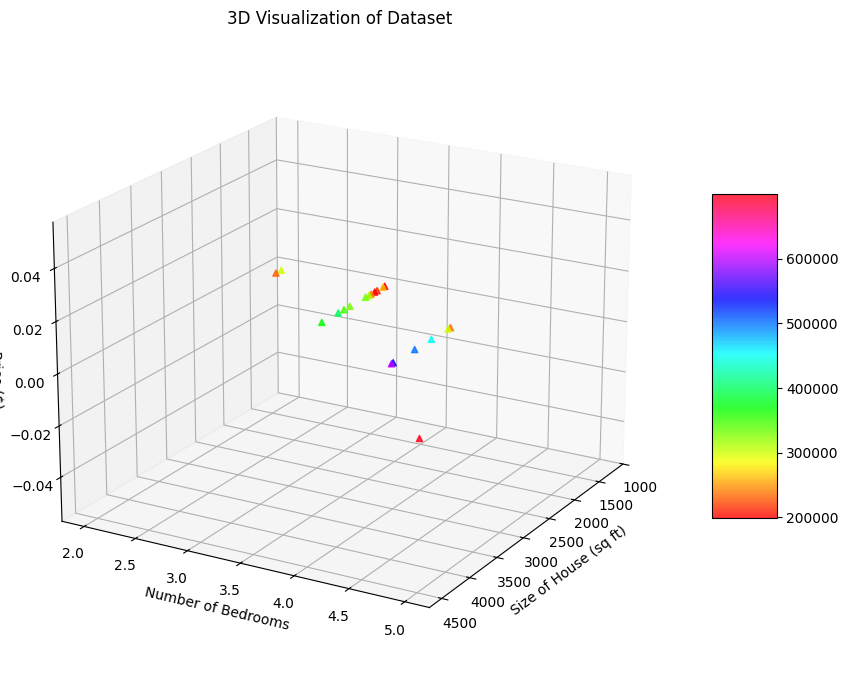

In [83]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [84]:
X = data[:, :2]  # Tamaño y habitaciones
X= X.reshape(-1,2)  
# Definir la función de normalización
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar
X, mu, sigma = featureNormalize(X)

# Imprimir resultados
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
    print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')

# Ver forma de X
print(X.shape)

mu= [2000.68085106    3.17021277], std = [7.86202619e+02 7.52842809e-01]
First 10 examples from the dataset:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
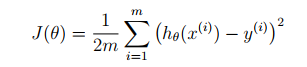

where the hypothesis h is given by

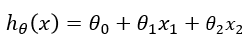




In [85]:
import numpy as np

# Normalización
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Función de costo (regresión lineal)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

# Cargar datos
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)  # Aseguramos que y tenga forma (m, 1)
m = y.shape[0]

# Normalizar y preparar X
X, mu, sigma = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])  # Agregar columna de 1s

# Inicializar theta
theta = np.zeros((3, 1))

# Calcular costo inicial
cost = compute_cost(X, y, theta)

# Mostrar resultados
print(X[0:5, :])
print(f"Model parameters (theta):\n{theta}")
print(f"Cost function at initial theta: {cost}")


[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
Model parameters (theta):
[[0.]
 [0.]
 [0.]]
Cost function at initial theta: 65591548106.45744


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

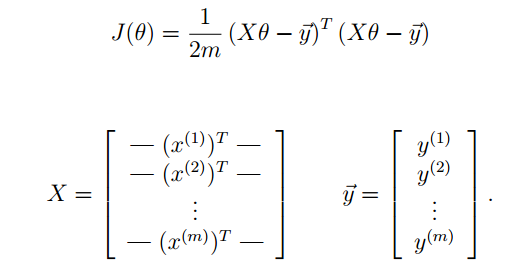

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

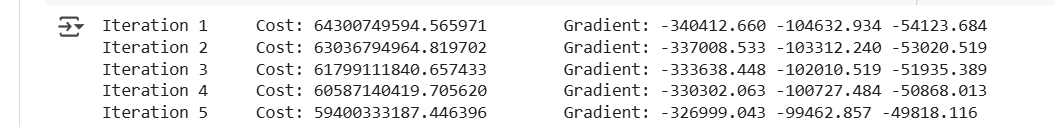

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Número de iteraciones y tasa de aprendizaje
iterations = 300
theta = np.zeros((3, 1))
alpha = 0.01

# Normalización
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma


# Función de costo (regresión lineal)
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

# Función para calcular el gradiente
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    grad = (1 / m) * X.T @ errors
    return grad

# Implementación del descenso por gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)  # Número de ejemplos
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        grad_J = compute_gradient(X, y, theta)  # Calcular el gradiente
        theta = theta - alpha * grad_J  # Actualizar theta

        J_history[iter] = cost_function(theta, X, y)  # Guardar el costo en cada iteración
        print(f"Iteration {iter + 1} \tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0,0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")

    return theta, J_history

# Normalizar los datos de entrada
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Cargar los datos
X = data[:, :2].reshape(-1, 2)
y = data[:, 2].reshape(-1, 1)  # Asegurarnos de que 'y' tenga la forma correcta
X, mu, sigma = featureNormalize(X)
m = len(y)
X = np.hstack([np.ones((m, 1)), X])  # Agregar la columna de 1s para el término de bias

# Ejecutar el descenso por gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta.ravel())

# Predecir valores para la casa de 2000 sqft y 3 habitaciones
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma


# Asegurarse de que `input_features` tenga la forma adecuada para la predicción
input_features_normalized = np.hstack((1, normalized_features))  # Agregar el término de bias (1)


# Realizar la predicción
predict1 = input_features_normalized @ theta

print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a price of ${predict1.item() * 10000:.2f}')





Iteration 1 	Cost: 64297776251.620102	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2 	Cost: 63031018305.521317	Gradient: -337008.533 -104400.141 -53569.489
Iteration 3 	Cost: 61790694237.532494	Gradient: -333638.448 -103056.168 -52449.188
Iteration 4 	Cost: 60576236901.991035	Gradient: -330302.063 -101731.908 -51347.615
Iteration 5 	Cost: 59387091739.988602	Gradient: -326999.043 -100427.059 -50264.474
Iteration 6 	Cost: 58222716488.389389	Gradient: -323729.052 -99141.324 -49199.470
Iteration 7 	Cost: 57082580895.895401	Gradient: -320491.762 -97874.410 -48152.317
Iteration 8 	Cost: 55966166445.978844	Gradient: -317286.844 -96626.028 -47122.729
Iteration 9 	Cost: 54872966086.507782	Gradient: -314113.976 -95395.896 -46110.427
Iteration 10 	Cost: 53802483965.895058	Gradient: -310972.836 -94183.734 -45115.137
Iteration 11 	Cost: 52754235175.605446	Gradient: -307863.107 -92989.267 -44136.588
Iteration 12 	Cost: 51727745498.859932	Gradient: -304784.476 -91812.224 -43174.513
Iteratio

# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

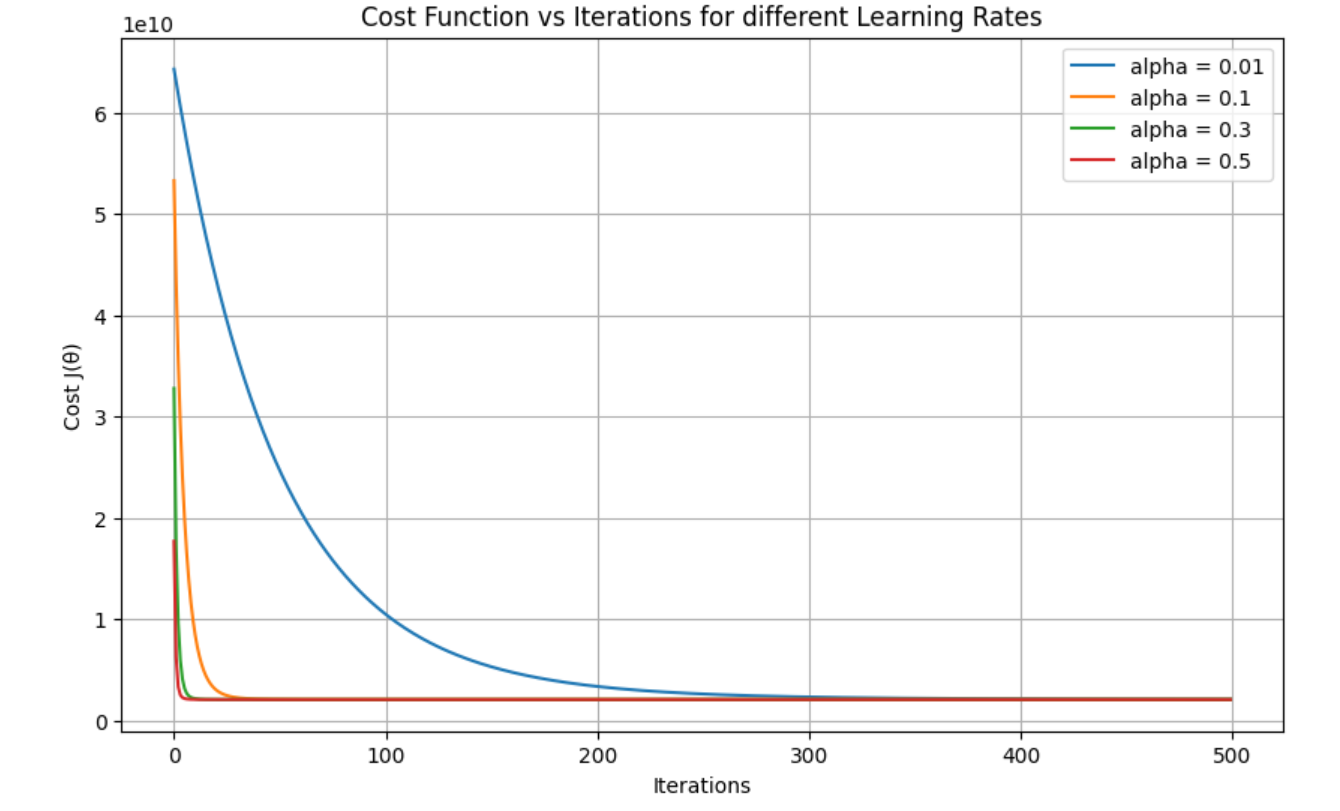

[[6.42977763e+10 5.32682599e+10 3.27178862e+10 1.76291158e+10]
 [6.30310183e+10 4.33890843e+10 1.71259835e+10 6.22234875e+09]
 [6.17906942e+10 3.54574304e+10 9.58680455e+09 3.28253130e+09]
 ...
 [2.06420540e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09]
 [2.06399268e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09]
 [2.06378240e+09 2.04328005e+09 2.04328005e+09 2.04328005e+09]]


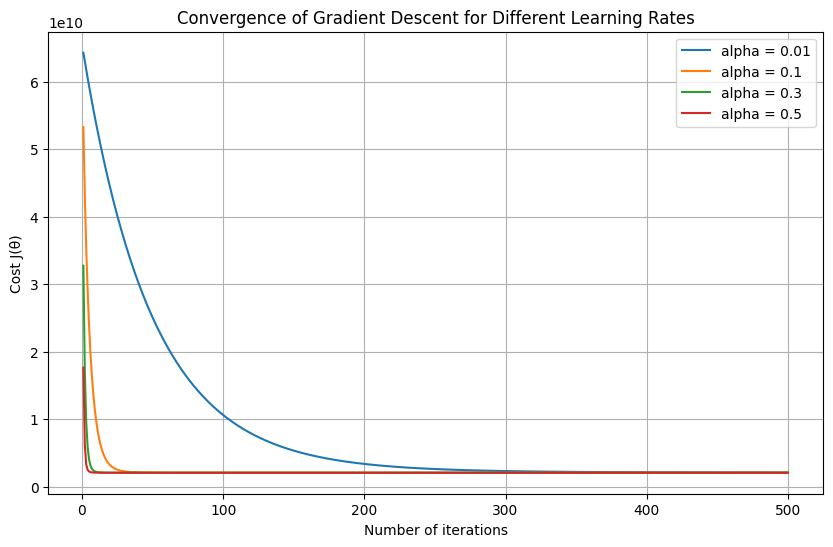

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número de iteraciones
iterations = 500
theta = np.zeros((3, 1))

# Vectores de diferentes tasas de aprendizaje
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])

# Matriz para almacenar los valores de J(θ) para cada tasa de aprendizaje y cada iteración
matrix_J = np.zeros((iterations, len(alpha_vector)))

# Función de costo (regresión lineal)
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J

# Función para calcular el gradiente
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    grad = (1 / m) * X.T @ errors
    return grad

# Implementación del descenso por gradiente
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)  # Número de ejemplos
    J_history = np.zeros(iterations)  # Para almacenar el valor de J en cada iteración

    for iter in range(iterations):
        grad_J = compute_gradient(X, y, theta)  # Calcular el gradiente
        theta = theta - alpha * grad_J  # Actualizar theta

        # Guardar el valor del costo en cada iteración
        J_history[iter] = cost_function(theta, X, y)  

    return theta, J_history

# Normalizar los datos de entrada
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Cargar los datos
X = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)  # Asegurarnos de que 'y' tenga la forma correcta
X, mu, sigma = featureNormalize(X)
m = len(y)
X = np.hstack([np.ones((m, 1)), X])  # Agregar la columna de 1s para el término de bias

# Ejecutar el descenso por gradiente para cada valor de alpha
for idx, alpha in enumerate(alpha_vector):
    # Reiniciar theta a ceros antes de cada ejecución
    theta = np.zeros((3, 1))
    
    # Ejecutar el descenso por gradiente con el valor de alpha especificado
    _, J_history = gradientDescent(X, y, theta, alpha, iterations)
    
    # Guardar la historia de J(θ) para este alpha en la matriz
    matrix_J[:, idx] = J_history


# Graficar la historia de J(θ) en función de las iteraciones para diferentes valores de alpha
plt.figure(figsize=(10, 6))
for idx, alpha in enumerate(alpha_vector):
    plt.plot(np.arange(1, iterations + 1), matrix_J[:, idx], label=f'alpha = {alpha}')

plt.xlabel('Number of iterations')
plt.ylabel('Cost J(θ)')
plt.title('Convergence of Gradient Descent for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


